<div align="center">

# ***Exploratory Data Analysis***
> Dataset: Pima Indians Diabetes

---
---

</div>

For Each Attribute: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import os 
from pathlib import Path

# **1. Descriptive Statistics**

    - Peek At Your Data
    - Dimensions of Your Data.
    - Data Types.
    - Class Distribution.
    - Data Summary.
    - Correlations.
    - Skewness.


##### Load the dataset - diabetes.csv
 

In [14]:
# /home/nii/Documents/SGU_2025_ML-Fundamentals/dataset/diabetes.csv
# Get the path of dataset
path_current_dir = Path.cwd()
path_current_ws = path_current_dir.resolve().parent
path_dataset = path_current_ws.resolve().joinpath("./dataset/diabetes.csv")

print(path_dataset)

/home/nii/Documents/SGU_2025_ML-Fundamentals/dataset/diabetes.csv


In [15]:
# Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(path_dataset, names=names)
peek = data.head(20)

In [16]:
peek

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6000,0.6270,50,1
1,1,85,66,29,0,26.6000,0.3510,31,0
2,8,183,64,0,0,23.3000,0.6720,32,1
3,1,89,66,23,94,28.1000,0.1670,21,0
4,0,137,40,35,168,43.1000,2.2880,33,1
5,5,116,74,0,0,25.6000,0.2010,30,0
6,3,78,50,32,88,31.0000,0.2480,26,1
7,10,115,0,0,0,35.3000,0.1340,29,0
8,2,197,70,45,543,30.5000,0.1580,53,1
9,8,125,96,0,0,0.0000,0.2320,54,1


##### Show dimension of data

In [17]:
data.shape

(768, 9)

##### Show datatype of columns

In [18]:
data.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

##### Check for missing data

In [19]:
data.isna().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

- So, no missing data

##### Show description of data

In [20]:
# Set precision to 3 decimal places, but it lead to error in some pandas version
# pd.set_option('precision', 3)   # Error with lastest pandas version
# So, we use: 
pd.options.display.float_format = '{:.4f}'.format
# pd.set_option('display.width', 100)
pd.options.display.width=100

description = data.describe()

In [21]:
description

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000,768.0000
mean,3.8451,120.8945,69.1055,20.5365,79.7995,31.9926,0.4719,33.2409,0.3490
std,3.3696,31.9726,19.3558,15.9522,115.2440,7.8842,0.3313,11.7602,0.4770
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0780,21.0000,0.0000
25%,1.0000,99.0000,62.0000,0.0000,0.0000,27.3000,0.2437,24.0000,0.0000
50%,3.0000,117.0000,72.0000,23.0000,30.5000,32.0000,0.3725,29.0000,0.0000
75%,6.0000,140.2500,80.0000,32.0000,127.2500,36.6000,0.6262,41.0000,1.0000
max,17.0000,199.0000,122.0000,99.0000,846.0000,67.1000,2.4200,81.0000,1.0000


##### Class distribution 

In [47]:
class_counts = data.groupby('class').size()
print(class_counts)

class
0    500
1    268
dtype: int64


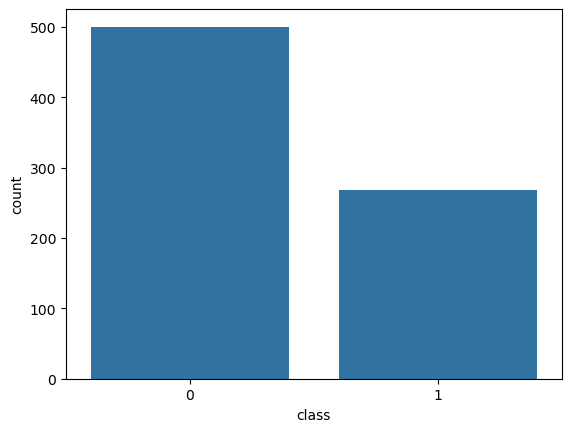

In [42]:
# Visualize class distribution
# plt.bar(class_counts.index, class_counts.values);
sns.countplot(x=data['class']);

&rarr; the number of class 0 is *almost double* the number of class 1

##### Correlations between attributes

In [24]:
data_corr = data.corr(method='pearson')
data_corr

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.0000,0.1295,0.1413,-0.0817,-0.0735,0.0177,-0.0335,0.5443,0.2219
plas,0.1295,1.0000,0.1526,0.0573,0.3314,0.2211,0.1373,0.2635,0.4666
pres,0.1413,0.1526,1.0000,0.2074,0.0889,0.2818,0.0413,0.2395,0.0651
skin,-0.0817,0.0573,0.2074,1.0000,0.4368,0.3926,0.1839,-0.1140,0.0748
test,-0.0735,0.3314,0.0889,0.4368,1.0000,0.1979,0.1851,-0.0422,0.1305
mass,0.0177,0.2211,0.2818,0.3926,0.1979,1.0000,0.1406,0.0362,0.2927
pedi,-0.0335,0.1373,0.0413,0.1839,0.1851,0.1406,1.0000,0.0336,0.1738
age,0.5443,0.2635,0.2395,-0.1140,-0.0422,0.0362,0.0336,1.0000,0.2384
class,0.2219,0.4666,0.0651,0.0748,0.1305,0.2927,0.1738,0.2384,1.0000


- So, visualize with heatmap

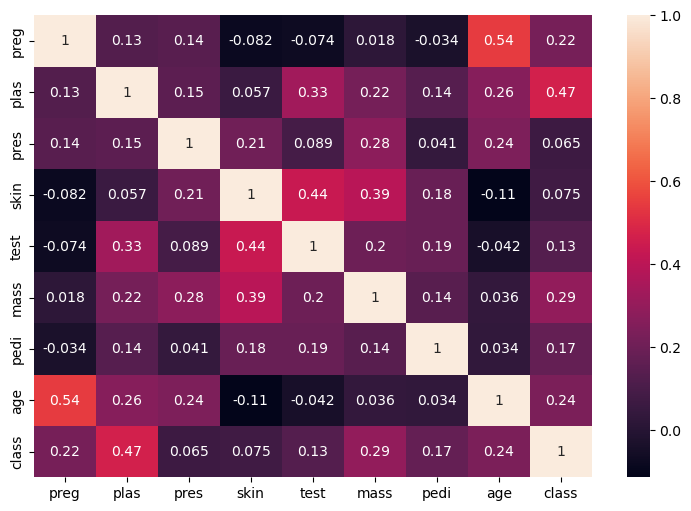

In [25]:
plt.figure(figsize=(9, 6))
sns.heatmap(data_corr, annot=True)
plt.show()

&rarr; little strong correlation between: 

- *age* & *plas* - 0.54
- *plas* & *class* - 0.47
- *skin* & *test* - 0.44

##### Skew of univariate distributions

- Using Gaussian (bell curve)

In [26]:
data_skew = data.skew()
print(data_skew)

preg     0.9017
plas     0.1738
pres    -1.8436
skin     0.1094
test     2.2723
mass    -0.4290
pedi     1.9199
age      1.1296
class    0.6350
dtype: float64


- Plot hist and density

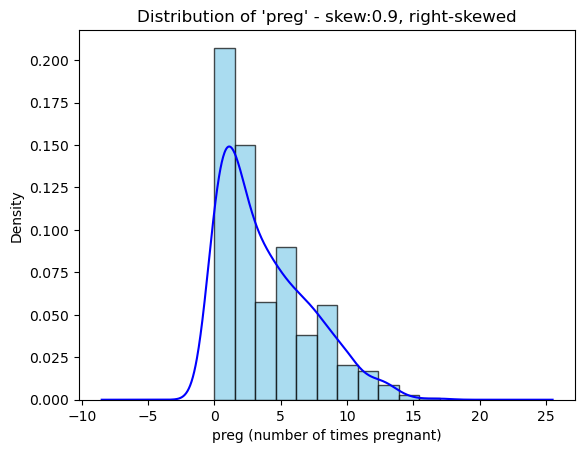

In [27]:
# density=True
#   -> normalize area of histogram = 1
data['preg'].hist(bins=11, density=True, alpha=0.7, color='skyblue', edgecolor="black")
data['preg'].plot(kind='density', color='blue')

plt.title("Distribution of 'preg' - skew:0.9, right-skewed")
plt.xlabel("preg (number of times pregnant)")
plt.ylabel('Density')
plt.show()

Comments:
- Most women in the dataset had 0-2 pregnancies 
- Some *outlier* women had very high pregnancy counts

&rarr; Not normal distribution, so reduce Linear Regression model effectiveness

&rarr; Need: feature transformation

# **2. Visualization**

## 2.1 Univariate plots

    - Histograms
    - Density plots
    - Box and Whisker plots

##### Histograms

- Get distribution of each attribute

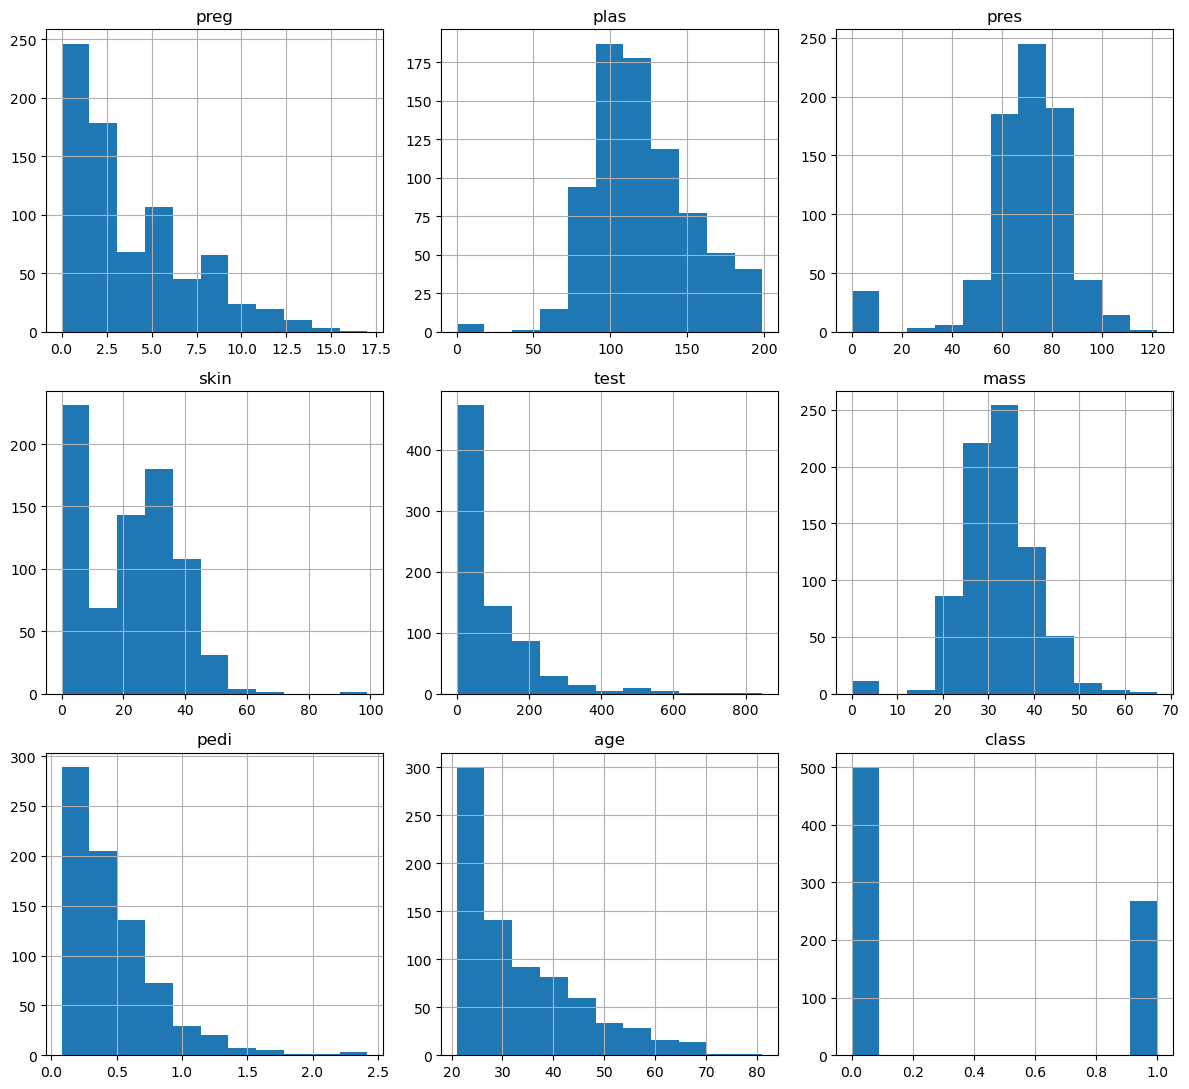

In [28]:
ax = data.hist(figsize=(12, 11), bins=11, layout=(3, 3))
plt.tight_layout()     # auto adjust space between subplots
plt.show()

##### Density

- Another way to get distribution of each attribute

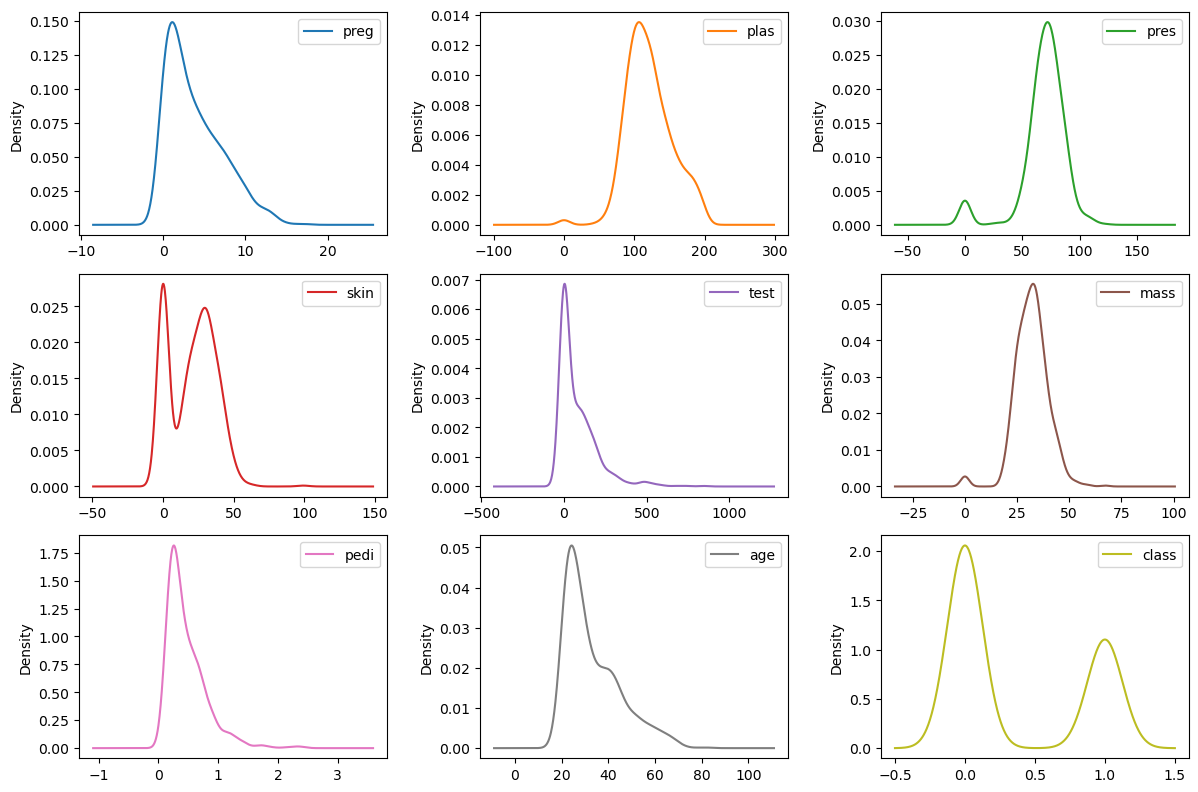

In [29]:
ax = data.plot(kind='density', subplots=True, sharex=False, figsize=(12, 8), layout=(3, 3))
plt.tight_layout()
plt.show()

Comments:

- *plas*, *pres* & *mass* have approximately Gaussian distribution (Normal distribution, mu - sigma)
- *preg*, *pedi*, *test* & *age* have an exponential distribution

##### Box and Whisker plots

- Summarize the distribution, draw line for:
    + median
    + 25th & 75th percentiles  

- Give us idea: *spread* of the data | *outlier*
    + *outlier*: values that are 1.5 times greater than the size of spread of the middle 50% of the data.

<figure>
    <div align="center">
        <img src="../images/boxplot_explaination.png">
    </div>

</figure>

- Example for boxplot

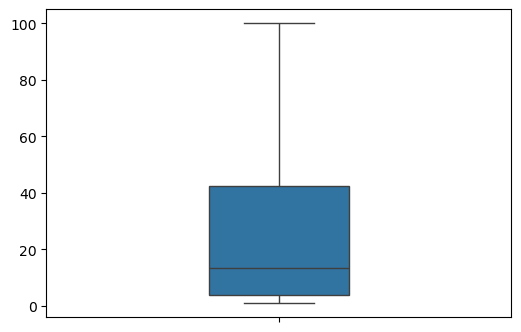

In [30]:
data_test_box = [1, 3, 7, 20, 50, 100]
# data_test_box = [25, 28, 29, 29, 30, 34, 35, 35, 37, 38, 50]
# Vẽ boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=data_test_box, width=0.3);

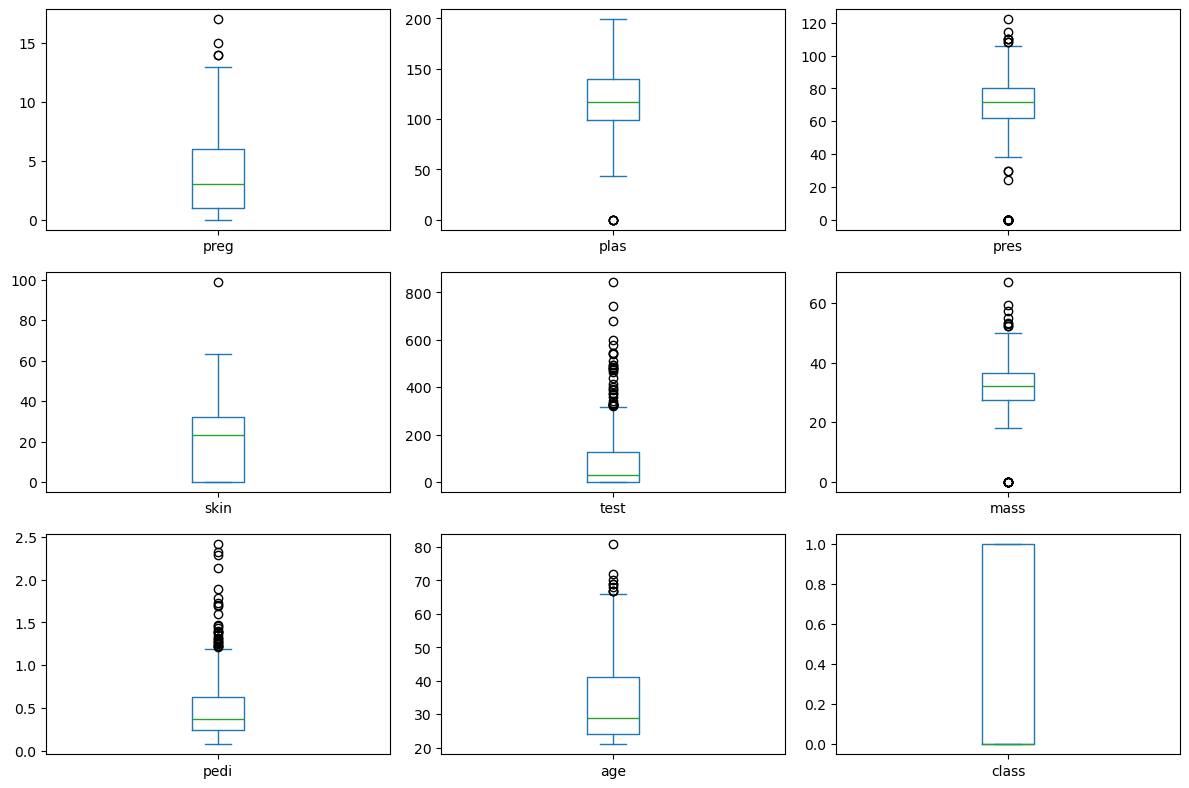

In [31]:
data.plot(kind='box', subplots=True, sharex=False,  layout=(3, 3), figsize=(12, 8)) 
plt.tight_layout()
plt.show()

## 2.2 Multivariate plots

    - Correlation matrix plot
    - Scatter matrix plot

##### Correlation matrix plot

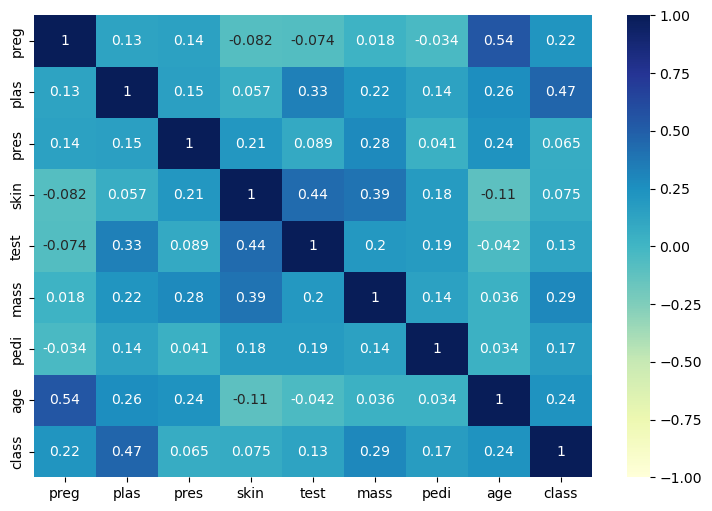

In [32]:
# Get the matrix correlation of data 
data_matrix_corr = data.corr()

# Plot the heatmap base on corr matrix data
plt.figure(figsize=(9, 6))
# cmap: viridis, plasma, inferno, magma, rocket, mako, flare, crest | 
#       Greys, Reds, Blues, Greens, Oranges, Purples |
#       YlGnBu, BuGn, PuBuGn, YlOrRd
sns.heatmap(data_matrix_corr, annot=True, vmin=-1, vmax=1, cmap='YlGnBu')
plt.show()

##### Scatter matrix plot

<Figure size 2000x1200 with 0 Axes>

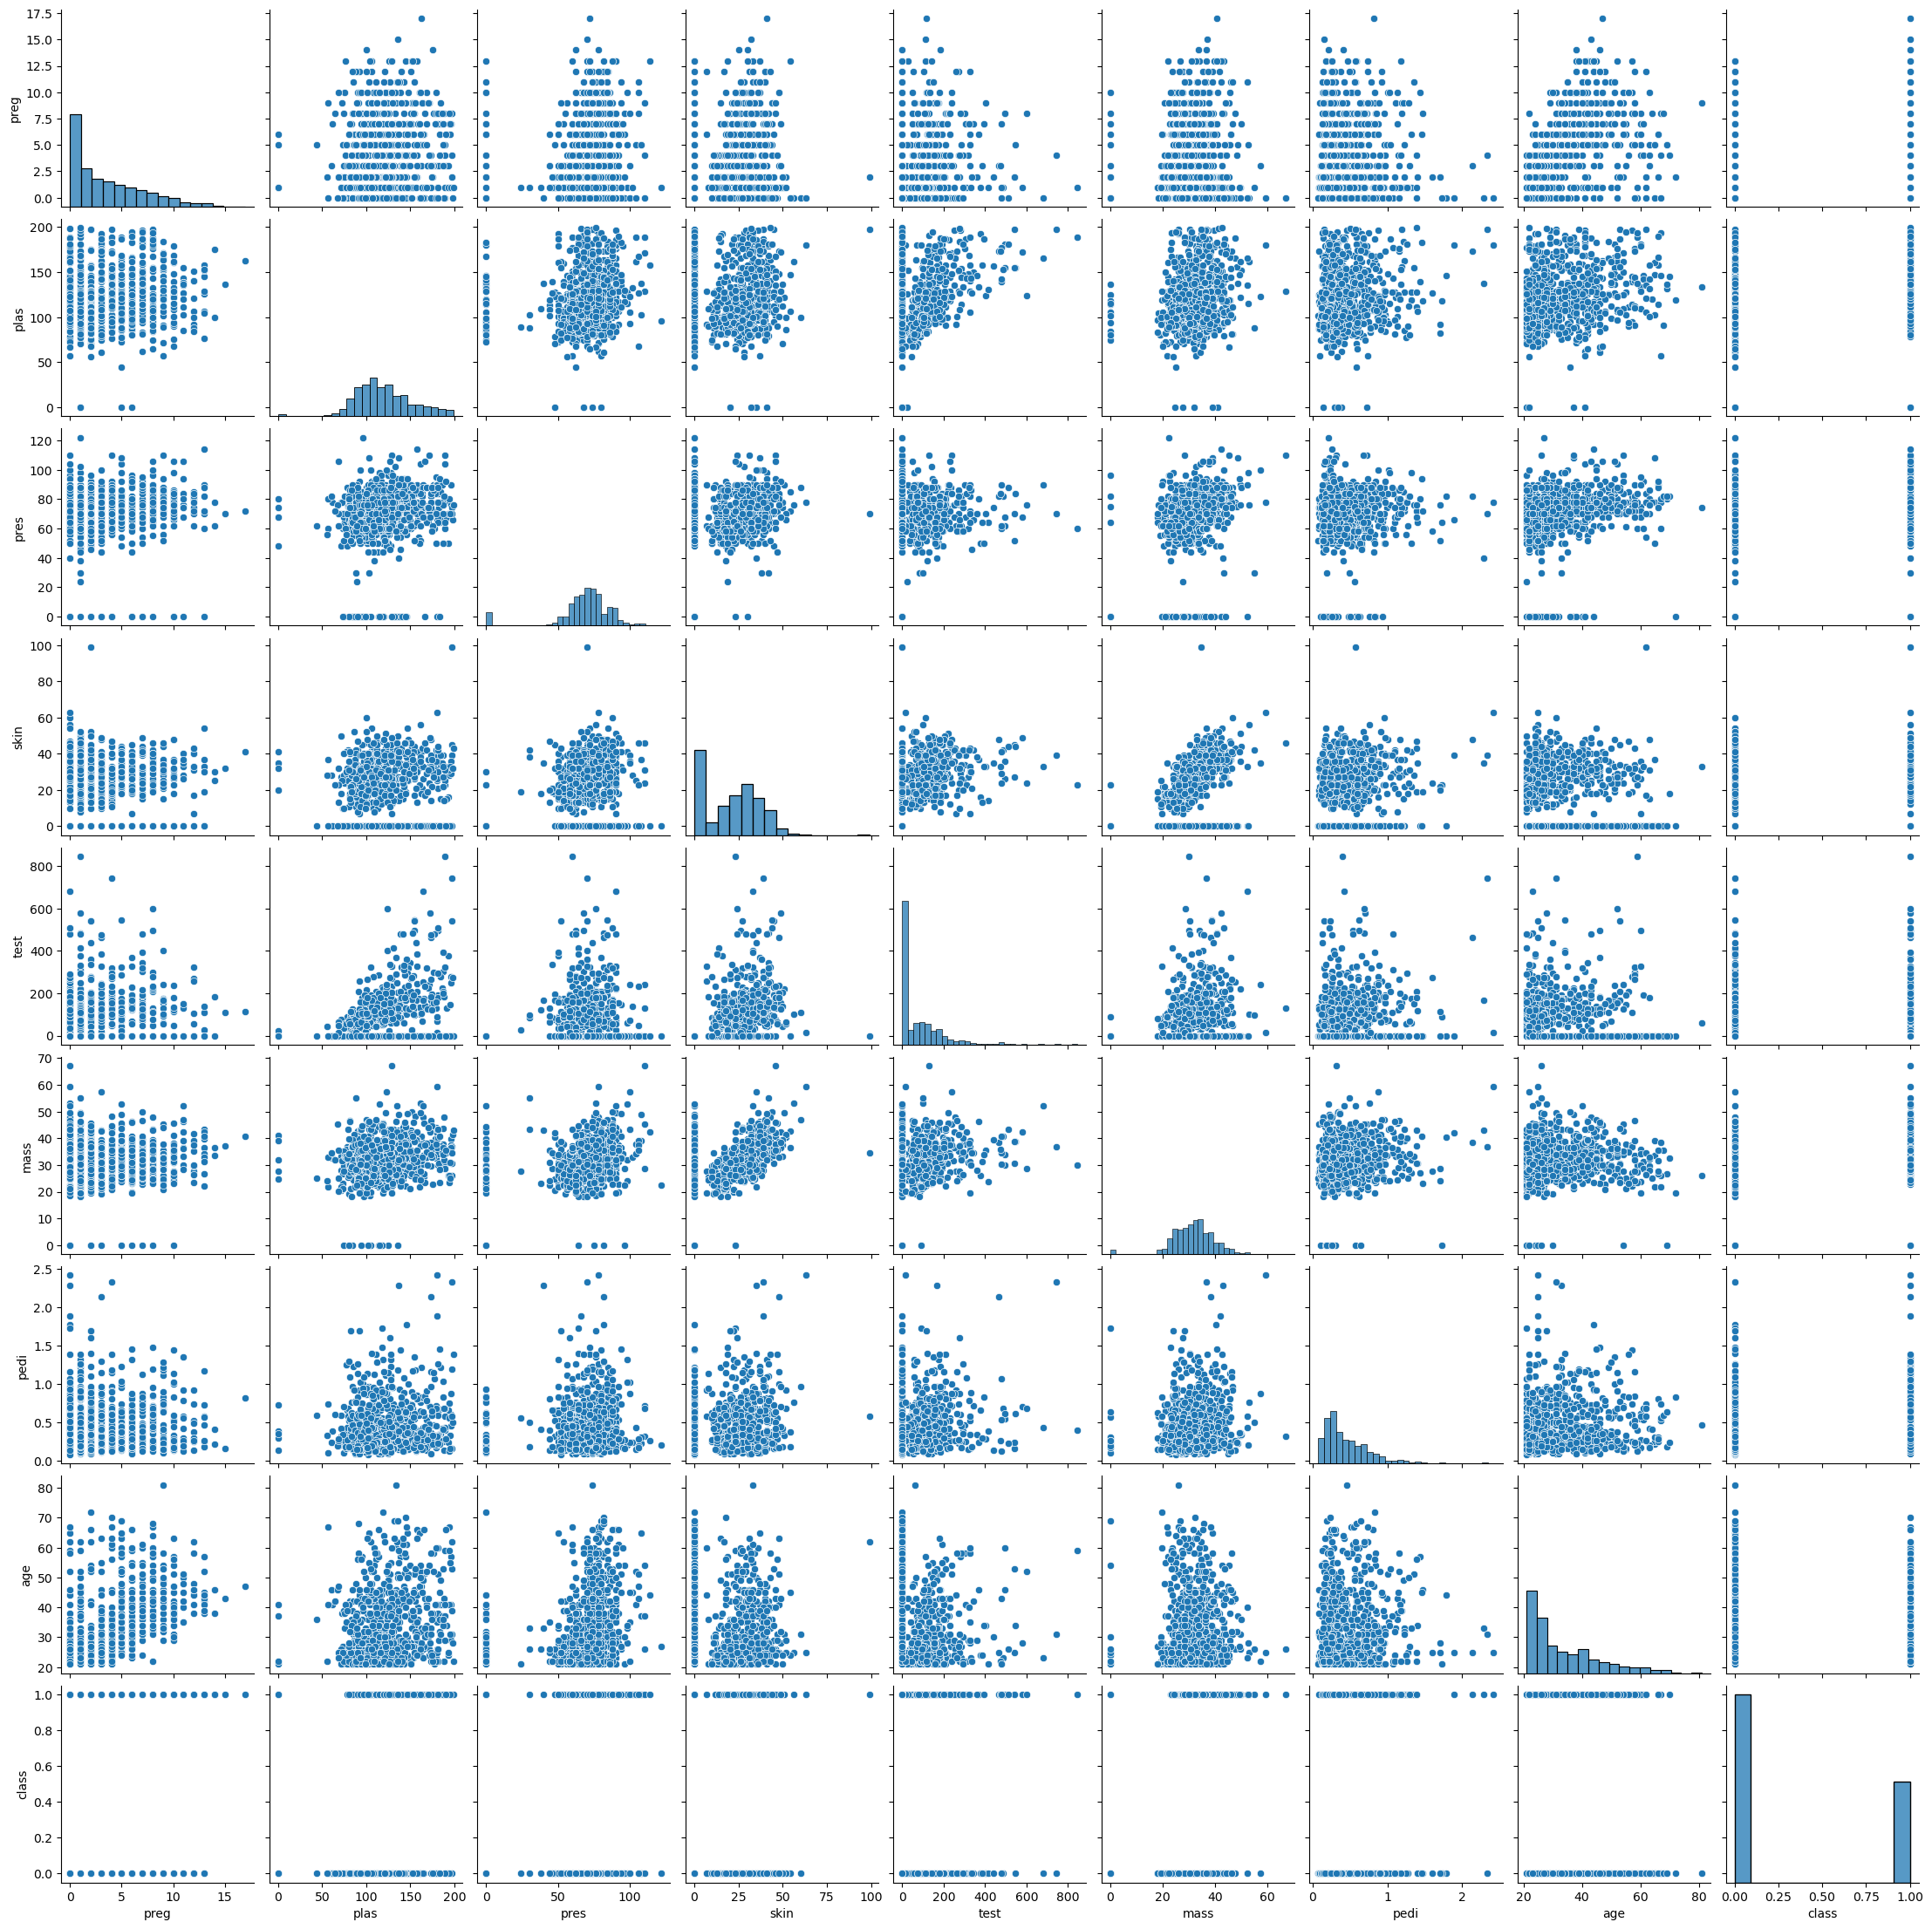

In [33]:
plt.figure(figsize=(20, 12))
sns.pairplot(data)
plt.show();

### The end